# Определение перспективного тарифа для телеком-компании

Мы выполняем исследования для компании "Мегалайн". Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Первичная обработка данных

In [2]:
import pandas as pd  #импортируем основные библиотеки
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [4]:
data_calls.info()
data_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
data_internet.info()
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
data_messages.info()
data_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
data_tariffs.info()
data_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Датасет содержит данные по 500 клиентам, потребуется заменить тип данных у столбцов с датой и временем, а также округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и гигабайтам.

##  Предобработка данных

### Подготовим данные

Заменим тип данных, обозначающих дату, со строчного на временной.

In [9]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [10]:
data_internet = data_internet[['id','mb_used','session_date','user_id']]
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Округлим значения данных вверх.

In [11]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

In [12]:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)

### Рассчитаем новые значения

Найдем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам.

In [13]:
data_calls['month'] = data_calls['call_date'].dt.month #рассчитаем значения для звонков
calls_grouped = data_calls.pivot_table(index=['user_id', 'month'], 
                        values ='duration',
                       aggfunc=['count','sum'])
calls_grouped.columns = ['calls', 'duration']
calls_grouped.head()

calls  duration
user_id month                 
1000    5         22     159.0
        6         43     172.0
        7         47     340.0
        8         52     408.0
        9         58     466.0

In [14]:
data_messages['month'] = data_messages['message_date'].dt.month #рассчитаем значения для смс
messages_grouped = data_messages.pivot_table(index=['user_id','month'],
                                                      values='id',
                                                      aggfunc='count')
messages_grouped.columns = ['messages']
messages_grouped.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

In [15]:
data_internet['month'] = data_internet['session_date'].dt.month #рассчитаем значения для интернета
internet_grouped = data_internet.pivot_table(index=['user_id','month'],
                                            values='mb_used',
                                            aggfunc='sum')
internet_grouped.head()

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0

In [16]:
data_grouped = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer') #Объединим таблицы
data_grouped = data_grouped.merge(internet_grouped, on=['user_id', 'month'], how='outer')
data_grouped.head()

calls  duration  messages  mb_used
user_id month                                    
1000    5       22.0     159.0      22.0   2256.0
        6       43.0     172.0      60.0  23257.0
        7       47.0     340.0      75.0  14016.0
        8       52.0     408.0      81.0  14070.0
        9       58.0     466.0      57.0  14581.0

In [17]:
data_grouped.loc[data_grouped['duration'].isna(), 'duration'] = 0 #заменим пропуски
data_grouped.loc[data_grouped['messages'].isna(), 'messages'] = 0
data_grouped.loc[data_grouped['mb_used'].isna(), 'mb_used'] = 0

In [18]:
for user in data_grouped.index: #укажем тип тарифа для каждого пользователя
    data_grouped.loc[user, 'tariff'] = data_users.loc[user[0]-1000, 'tariff']
data_grouped.head()

calls  duration  messages  mb_used tariff
user_id month                                           
1000    5       22.0     159.0      22.0   2256.0  ultra
        6       43.0     172.0      60.0  23257.0  ultra
        7       47.0     340.0      75.0  14016.0  ultra
        8       52.0     408.0      81.0  14070.0  ultra
        9       58.0     466.0      57.0  14581.0  ultra

Теперь для каждого пользователя посчитаем помесячную выручку (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [19]:
def total_revenue(row): #зададим функцию котоая будет считать прибыль по месяцам
    duration = row['duration']
    mb = row['mb_used']
    messages = row['messages']
    if row['tariff'] == 'ultra':
        extra_duration = duration - data_tariffs.loc[1,'minutes_included']
        extra_messages = messages - data_tariffs.loc[1,'messages_included']
        extra_mb = mb - data_tariffs.loc[1,'mb_per_month_included']
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        return (data_tariffs.loc[1,'rub_monthly_fee'] + data_tariffs.loc[1,'rub_per_minute'] * extra_duration +
        data_tariffs.loc[1,'rub_per_gb'] * extra_mb/1024 + data_tariffs.loc[1,'rub_per_message'] * extra_messages)
    else:
        extra_duration = duration - data_tariffs.loc[0,'minutes_included']
        extra_messages = messages - data_tariffs.loc[0,'messages_included']
        extra_mb = mb - data_tariffs.loc[0,'mb_per_month_included']
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        return (data_tariffs.loc[0,'rub_monthly_fee'] + data_tariffs.loc[0,'rub_per_minute'] * extra_duration +
        data_tariffs.loc[0, 'rub_per_gb'] * extra_mb/1024 + data_tariffs.loc[0,'rub_per_message'] * extra_messages)


In [20]:
data_grouped['revenue'] = data_grouped.apply(total_revenue, axis=1)
data_grouped.head(10)

calls  duration  messages  mb_used tariff     revenue
user_id month                                                       
1000    5       22.0     159.0      22.0   2256.0  ultra  1950.00000
        6       43.0     172.0      60.0  23257.0  ultra  1950.00000
        7       47.0     340.0      75.0  14016.0  ultra  1950.00000
        8       52.0     408.0      81.0  14070.0  ultra  1950.00000
        9       58.0     466.0      57.0  14581.0  ultra  1950.00000
        10      57.0     350.0      73.0  14717.0  ultra  1950.00000
        11      43.0     338.0      58.0  14768.0  ultra  1950.00000
        12      46.0     333.0      70.0   9827.0  ultra  1950.00000
1001    11      59.0     430.0       0.0  18452.0  smart  1153.90625
        12      63.0     414.0       0.0  14053.0  smart   550.00000

## Проведем анализ данных

Посчитаем, сколько в среднем каждому пользователю требуется минут, сообщений и мегабайт в месяц.

In [21]:
means = data_grouped.pivot_table(index='user_id', values=['duration','mb_used','messages'], aggfunc='mean')
for user_id in data_users['user_id']:
    means.loc[user_id, 'tariff'] = data_users.loc[user_id-1000, 'tariff']
means.head()

,duration,mb_used,messages,tariff
user_id,,,,
1000,320.750000,13436.500000,62.0,ultra
1001,422.000000,16252.500000,0.0,smart
1002,216.714286,16597.571429,10.0,smart
1003,764.400000,11465.800000,76.0,ultra
1004,123.375000,18646.500000,149.0,ultra


Найдем мсреднее, дисперсию и стандартное отклонение:

In [22]:
data_stat = means.pivot_table(index='tariff', values=['duration', 'mb_used', 'messages'],
                            aggfunc={'duration': [np.mean, np.var, np.std], 
                             'mb_used': [np.mean, np.var, np.std], 
                             'messages': [np.mean, np.var, np.std]})
data_stat.head()

duration                                 mb_used               \
              mean         std           var          mean          std   
tariff                                                                    
smart   419.634803  145.031543  21034.148607  16201.387920  3583.640810   
ultra   527.821819  281.786359  79403.551850  19592.839001  8318.753942   

                       messages                          
                 var       mean        std          var  
tariff                                                   
smart   1.284248e+07  32.352078  26.512448   702.909910  
ultra   6.920167e+07  54.030743  46.366246  2149.828793

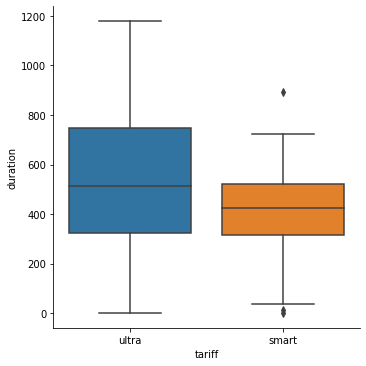

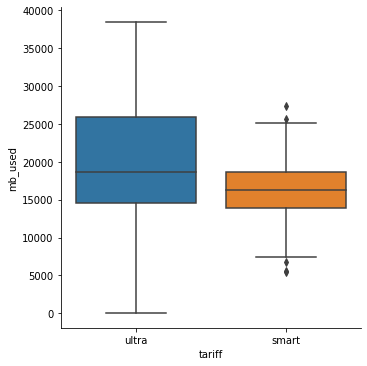

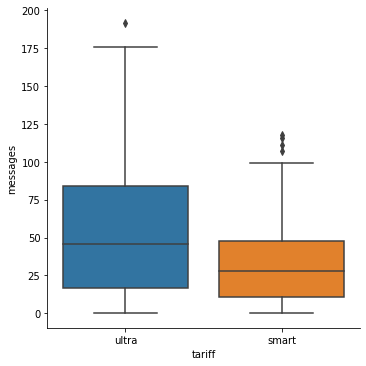

In [23]:
for column in ['duration', 'mb_used', 'messages']:
    sns.catplot(x='tariff', y=column,kind='box', data=means) 

Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.

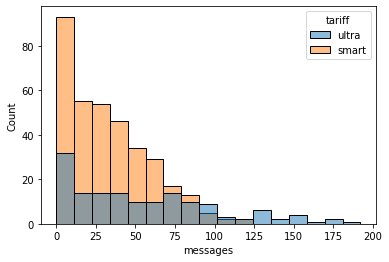

In [24]:
sns.histplot(data=means, x="messages",hue='tariff'); 

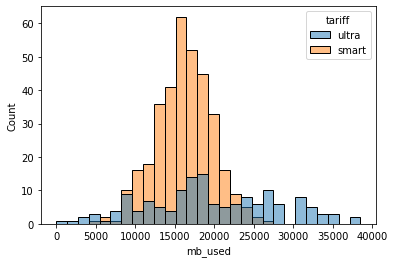

In [25]:
sns.histplot(data=means, x="mb_used",hue='tariff');   

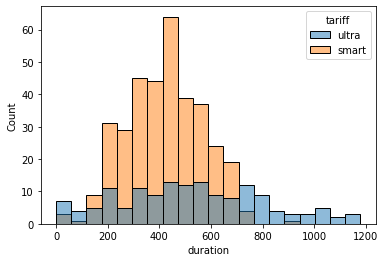

In [26]:
sns.histplot(data=means, x="duration",hue='tariff');

По гистограммам наглядно видно, что дисперсия по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям: по длительности разговора, числу сообщений и использованному интернет-трафику. Также на гистограммах видно, что мода у "Смарта" явно выражена.

## Проверка гипотез

### "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

*H0*  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

*H1*  — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

*alpha* = 1%

In [27]:
ultra = data_grouped.query('tariff == "ultra"')['revenue']
smart = data_grouped.query('tariff == "smart"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711368788e-296
Отвергаем нулевую гипотезу


In [28]:
data_grouped.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1233.349467
ultra,2060.529971


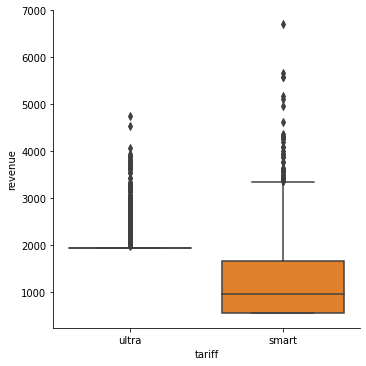

In [29]:
sns.catplot(x='tariff', y='revenue',kind='box', data=data_grouped);

Средние значения выручки по тарифам различаются почти в 2 раза. Если у пользователя подключен тариф "Смарт" с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета.

В заключение можно подтвердить с уверенностью 99%, что доходы "Мегалайна" с пользователя по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт".

### "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

*H0*  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

*H1*  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

*alpha* = 1%

In [30]:
for user in data_grouped.index:# добавим наименование населенного пункта для каждого пользователя
    data_grouped.loc[user, 'city'] = data_users.loc[user[0]-1000, 'city']
data_grouped.head()

calls  duration  messages  mb_used tariff  revenue       city
user_id month                                                               
1000    5       22.0     159.0      22.0   2256.0  ultra   1950.0  Краснодар
        6       43.0     172.0      60.0  23257.0  ultra   1950.0  Краснодар
        7       47.0     340.0      75.0  14016.0  ultra   1950.0  Краснодар
        8       52.0     408.0      81.0  14070.0  ultra   1950.0  Краснодар
        9       58.0     466.0      57.0  14581.0  ultra   1950.0  Краснодар

In [42]:
moscow = data_grouped.query('city == "Москва"')['revenue']
other_cities = data_grouped.query('city != "Москва"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    moscow, 
    other_cities, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


In [33]:
def city_type(city):
    if city == 'Москва': return 'moscow'
    else: return 'other'

In [34]:
data_grouped['city_type'] = data_grouped['city'].apply(city_type)
data_grouped.head(10)

calls  duration  messages  mb_used tariff     revenue  \
user_id month                                                          
1000    5       22.0     159.0      22.0   2256.0  ultra  1950.00000   
        6       43.0     172.0      60.0  23257.0  ultra  1950.00000   
        7       47.0     340.0      75.0  14016.0  ultra  1950.00000   
        8       52.0     408.0      81.0  14070.0  ultra  1950.00000   
        9       58.0     466.0      57.0  14581.0  ultra  1950.00000   
        10      57.0     350.0      73.0  14717.0  ultra  1950.00000   
        11      43.0     338.0      58.0  14768.0  ultra  1950.00000   
        12      46.0     333.0      70.0   9827.0  ultra  1950.00000   
1001    11      59.0     430.0       0.0  18452.0  smart  1153.90625   
        12      63.0     414.0       0.0  14053.0  smart   550.00000   

                    city city_type  
user_id month                       
1000    5      Краснодар     other  
        6      Краснодар     other  
        7      Краснодар     other  
        8      Краснодар     other  
        9      Краснодар     other  
        10     Краснодар     other  
        11     Краснодар     other  
        12     Краснодар     other  
1001    11        Москва    moscow  
        12        Москва    moscow

In [35]:
data_grouped.pivot_table(index='city_type', values='revenue', aggfunc='mean')

,revenue
city_type,
moscow,1507.276762
other,1482.063727


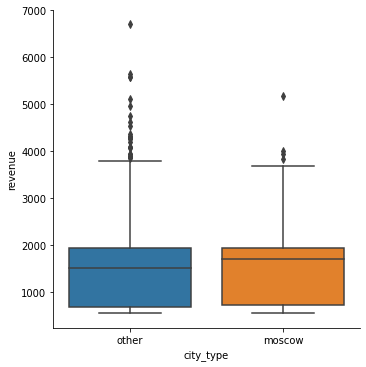

In [36]:
sns.catplot(x='city_type', y='revenue',kind='box', data=data_grouped);

Данный статистический тест не дал возможности опровергунть исходную гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, доходы в Московском регионе практически не отличаются от других населенных пунктов.

## Общий вывод

По результатам статистического анализа доходы от тарифа «Ультра» больше, чем от тарифа «Смарт»: в среднем «Мегалайн» от одного пользователя в месяц получает 1950 рублей и 988 рублей соответственно.

Особенности использования тарифов заключаются в следующем:

- Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают еще 438 рублей ежемесячно.
- Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.
- Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима  и составляет 188 руб.: 1734 руб. в Москве против 1546 руб в других населенных пунктах.